# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez
#### Luisa María Morales Sánchez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

***Punto 1***

In [1]:
#Librerias
import numpy as np
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import matplotlib.pylab as plt

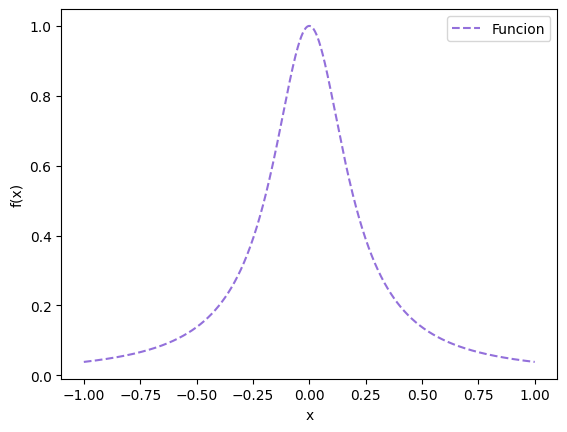

In [ ]:
#funcion original
f = lambda x: 1/(1+25*x**2)
x = np.linspace(-1,1,1000)

plt.figure()
plt.plot(x,f(x),'--',color='mediumpurple',label='Funcion')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


In [ ]:
#Polinomio de interpolacion Lagrange
N = 4 #numero de puntos
n = N+1
xn = np.linspace(-1,1,n) #puntos a interpolar
p = lagrange(xn,f(xn)) #funcion de interpolacion
xl = np.linspace(np.min(xn),np.max(xn))

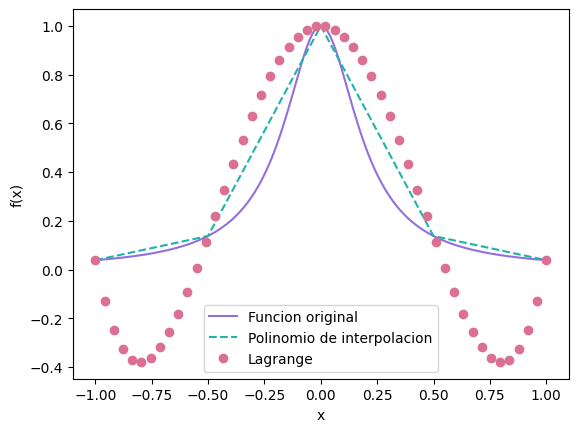

In [ ]:
#grafica de funcion y polinomio de interpolacion
plt.figure()
plt.plot(x,f(x),'-',color='mediumpurple',label='Funcion original')
plt.plot(xn,f(xn),'--',color='lightseagreen',label='Polinomio de interpolacion')
plt.plot(xl,p(xl),'o',color='palevioletred',label='Lagrange')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

***Punto 2***

In [39]:
import sympy as sp
sp.init_printing()

g = lambda y: 1/(1+25*y**2)
y = sp.symbols('y')
g(y)

    1    
─────────
    2    
25⋅y  + 1

In [ ]:
#derivada de la funcion
dg5 = sp.diff(g(y),y,5)
g5 = sp.lambdify(y,dg5,'numpy')

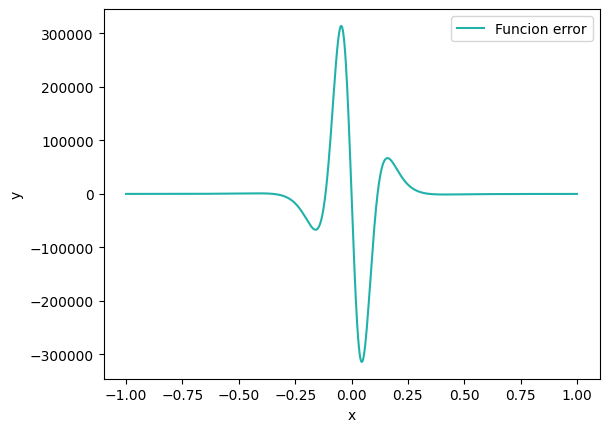

In [ ]:
#funcion de error
plt.figure()
plt.plot(x,g5(x),color='lightseagreen',label='Funcion error')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import math as mt
xmax = np.max(abs(g5(x)))
zeta = np.argmax(abs(g5(x)))
x[zeta]

-0.04504504504504503

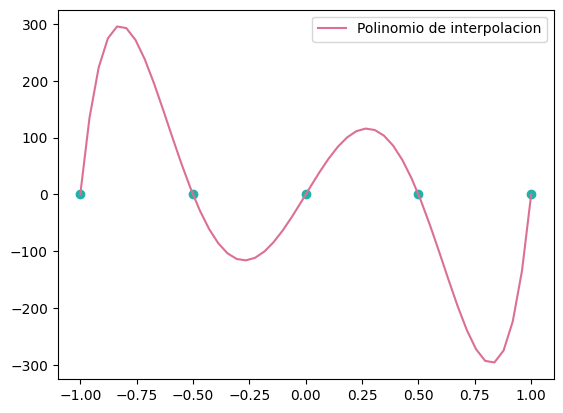

In [ ]:
#polinomio de interpolacion
plt.figure()
plt.plot(xn,f(xn),'o',color='lightseagreen')
plt.plot(xl,xmax/(mt.factorial(n))*(xl-xn[0])*(xl-xn[1])*(xl-xn[2])*(xl-xn[3])*(xl-xn[4]),color='palevioletred',label='Polinomio de interpolacion')
plt.legend()
plt.show()

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange. Encontrar la funcion de error

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

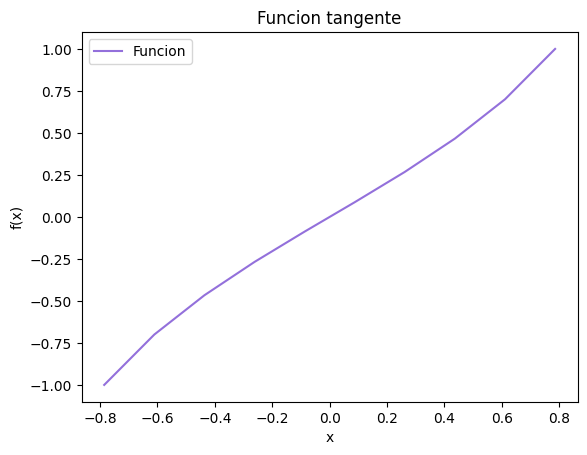

In [2]:
#funcion original
h = lambda z: np.tan(z)
z = np.linspace(-np.pi/4,np.pi/4,10)
#intervalos
N1 = 10

plt.figure()
plt.plot(z,h(z),color='mediumpurple',label='Funcion')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Funcion tangente')
plt.show()

In [3]:
#Polinomio de interpolacion de Lagrange
n1 = N1+1
zn = np.linspace(-np.pi/4,np.pi/4,n1) #puntos a interpolar
pz = lagrange(zn,h(zn)) #funcion de interpolacion
zl = np.linspace(np.min(zn),np.max(zn))

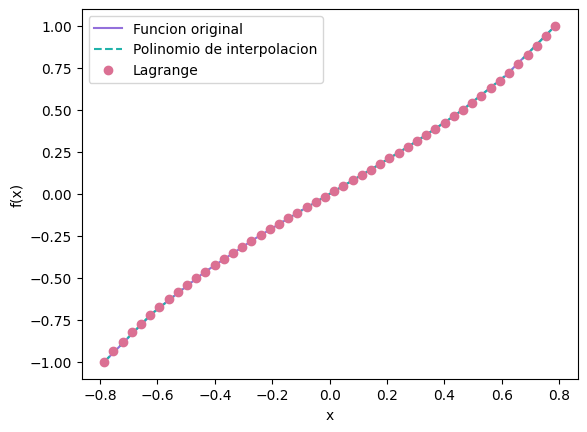

In [4]:
plt.figure()
plt.plot(z,h(z),'-',color='mediumpurple',label='Funcion original')
plt.plot(zn,h(zn),'--',color='lightseagreen',label='Polinomio de interpolacion')
plt.plot(zl,pz(zl),'o',color='palevioletred',label='Lagrange')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [5]:
import sympy as sp
sp.init_printing()

z1 = lambda m: sp.tan(m)
m = sp.symbols('m')
z1(m)

tan(m)

In [6]:
#derivada de la funcion tangente
dh = sp.diff(z1(m),m,10)
H = sp.lambdify(m,dh,'numpy')

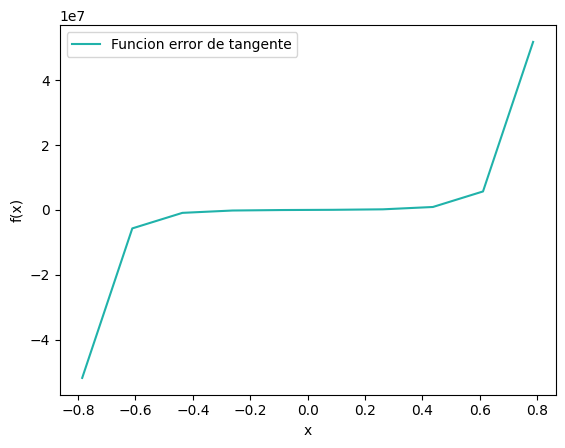

-0.7853981633974483

In [8]:
#funcion de error
plt.figure()
plt.plot(z,H(z),color='lightseagreen',label='Funcion error de tangente')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
zmax = np.max(abs(H(z)))
zzeta = np.argmax(abs(H(z)))
z[zzeta]

##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


In [10]:
import pandas as pd
import sympy as sp

***Punto a***

In [11]:
xm =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fxm =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
df = pd.DataFrame({'x':xm,'f(x)':fxm})
df

,x,f(x)
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


In [31]:
#Polinomio de Lagrange
p_la = lagrange(xm,fxm)
x_l = np.linspace(np.min(xm),np.max(xm))

new_x_range = np.arange(1.1, 2.1, 0.1)

***Punto b***

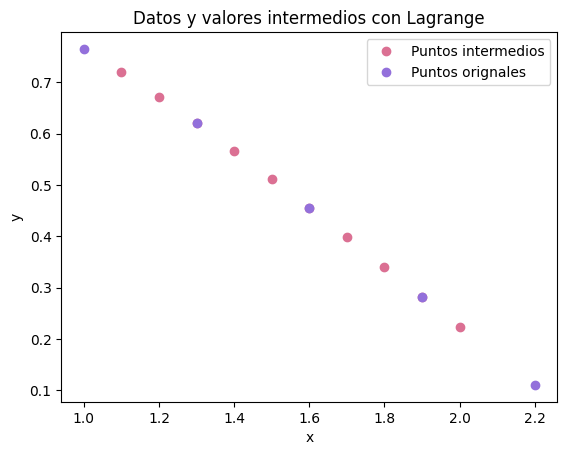

In [38]:
#grafica de funcion y polinomio de interpolacion de Lagrange
plt.figure()
plt.title('Datos y valores intermedios con Lagrange')
plt.plot(new_x_range,p_la(new_x_range),'o',color='palevioletred',label='Puntos intermedios')
plt.plot(xm,fxm,'o',color='mediumpurple',label='Puntos orignales')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

***Punto c. Método de Spline Cubic***

In [32]:
spline = CubicSpline(xm,fxm)

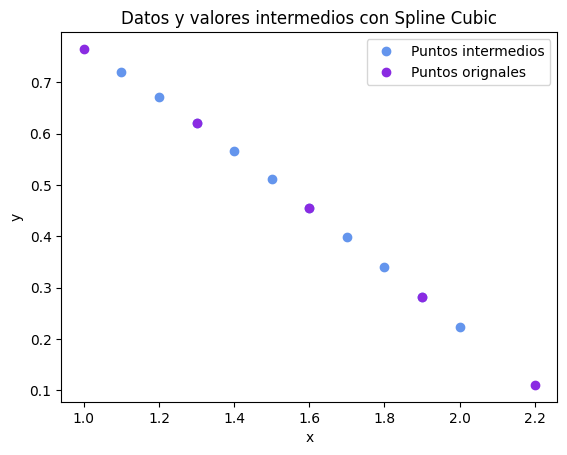

In [36]:
plt.figure()
plt.title('Datos y valores intermedios con Spline Cubic')
plt.plot(new_x_range,spline(new_x_range),'o',color='cornflowerblue',label='Puntos intermedios')
plt.plot(xm,fxm,'o',color='blueviolet',label='Puntos orignales')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Dado que los puntos a interpolar son pocos y es una funcion sencilla, si comparamos el método de Spline Cubic con el de Lagrange no notaremos una gran diferencia, los dos métodos hacen una buena interpolacion en este caso.

# 4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [19]:
#Importar imagen
import urllib.request
pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato

In [16]:
#Puntos superiores del pato
xi = np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
yi = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

In [17]:
#Polinomio de Lagrange
pi = lagrange(xi,yi)
xii = np.linspace(np.min(xi),np.max(xi))

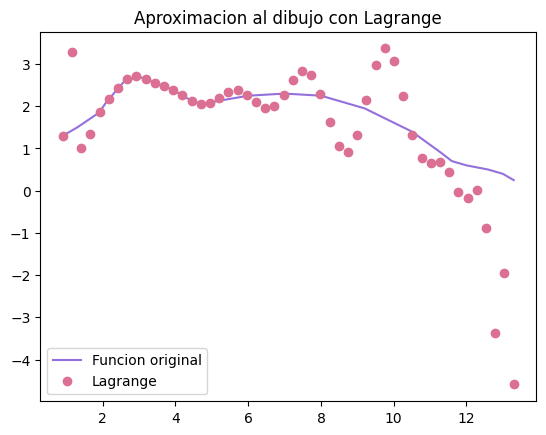

In [27]:
#Gráfica del Polinomio de Lagrange
plt.figure()
plt.title('Aproximacion al dibujo con Lagrange')
plt.plot(xi,yi,'-',color='mediumpurple',label='Funcion original')
plt.plot(xii,pi(xii),'o',color='palevioletred',label='Lagrange')
plt.legend()
plt.show()

In [20]:
#Metodo de Spline Cubics
cubic = CubicSpline(xi,yi)

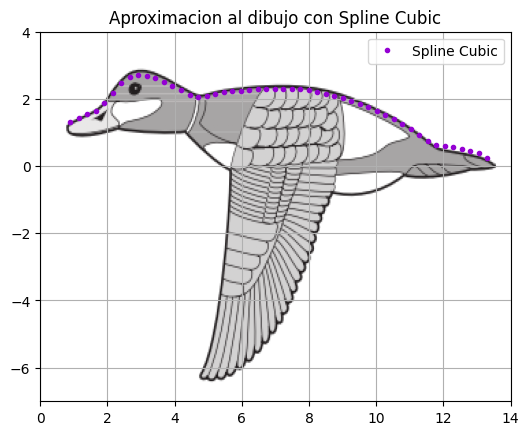

In [29]:
#Representacion de la parte superior del pato con Spline Cubic
plt.figure()
plt.title('Aproximacion al dibujo con Spline Cubic')
plt.imshow(imagen_pato,extent=(0.4,14,-6.8,3.45))
plt.plot(xii,cubic(xii),'.',color='darkviolet',label='Spline Cubic')
plt.xlim(0,14)
plt.ylim(-7,4)
plt.grid()
plt.legend()
plt.show()

***Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?***

La interpolacion de Lagrange presenta ruido dado que el metodo interpola puntos en un intervalo muy amplio, como la parte superior del parto cuenta con mas de 15 puntos, el polinomio de lagrange es de un grado muy alto, lo que causa las fluctuaciones. En comparación con el método de Spline Cubic que es mucho más preciso y utiliza más de un polinomio, garantizando continuidad.